# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "82db759698c15daf45f70abd9fc6998b694cc049"
connection.set_access_token(API_TOKEN)

# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O moving_average_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/ema_crossover.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' moving_average_crossover.py

In [5]:
from moving_average_crossover import StrategyEMARegularOrder as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 130078,
 'strategyId': 'bf4576f27b2b424bb80fb54b25bab563'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('SBIN', exchange='NSE')
instrument

[{'id': 2733992, 'value': 'NSE:DSPPSBINAV'},
 {'id': 1, 'value': 'NSE:SBIN'},
 {'id': 2511540, 'value': 'NSE:SBIN.AF'},
 {'id': 2511541, 'value': 'NSE:SBIN.BL'},
 {'id': 2511557, 'value': 'NSE:SBIN.N2'},
 {'id': 2511559, 'value': 'NSE:SBIN.N3'},
 {'id': 2511560, 'value': 'NSE:SBIN.N4'},
 {'id': 2511561, 'value': 'NSE:SBIN.N5'},
 {'id': 2511563, 'value': 'NSE:SBIN.N6'},
 {'id': 2511558, 'value': 'NSE:SBIN.U2'}]

## Setup Parameters

In [9]:
parameters = {
  'TIMEPERIOD1': 12,
  'TIMEPERIOD2': 20,
}

In [10]:
initial_virtual_funds = 7000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'EMA Regular Order Strategy' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════╕
│ Config                  │ Value                                  │
╞═════════════════════════╪════════════════════════════════════════╡
│ Strategy Name           │ EMA Regular Order Strategy             │
├─────────────────────────┼────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                            │
├─────────────────────────┼────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:SBIN']                           │
├─────────────────────────┼────────────────────────────────────────┤
│ Quantity/Lots           │ 5                                      │
├─────────────────────────┼────────────────────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30              │
├─────────────────────────┼────────────────────────────────────────┤
│ End Timestamp           │ 

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (10)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [14]:
print(logs)

[2023-08-22 11:31:39+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 11:31:39+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 11:31:40+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 11:31:40+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 11:31:41+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 11:31:41+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 11:31:42+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 11:31:42+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 11:31:42+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 11:31:43+00:00] Logs not available yet. Please retry in sometime.


[2023-08-22 17:01:38] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 17:01:38] Sanity checks on cfg successful.
[2023-08-22 17:01:38] Currency set to "INR"
[2023

### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute
0,NSE,SBIN,2021-08-06 12:15:00+05:30,SELL,5,₹,438.80,2021-08-06 15:30:00+05:30,BUY,5,₹,435.65,15.75,15.75
1,NSE,SBIN,2021-08-25 09:15:00+05:30,BUY,5,₹,419.00,2021-08-25 15:30:00+05:30,SELL,5,₹,416.05,-14.75,1.00
2,NSE,SBIN,2021-08-26 13:15:00+05:30,SELL,5,₹,412.15,2021-08-26 15:30:00+05:30,BUY,5,₹,410.70,7.25,8.25
3,NSE,SBIN,2021-08-30 11:15:00+05:30,BUY,5,₹,417.80,2021-08-30 15:30:00+05:30,SELL,5,₹,422.80,25.00,33.25
4,NSE,SBIN,2021-09-07 14:15:00+05:30,SELL,5,₹,427.80,2021-09-07 15:30:00+05:30,BUY,5,₹,428.85,-5.25,28.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,NSE,SBIN,2023-07-12 11:15:00+05:30,BUY,5,₹,593.70,2023-07-12 15:15:00+05:30,SELL,5,₹,589.00,-23.50,-129.00
120,NSE,SBIN,2023-07-12 15:15:00+05:30,SELL,5,₹,589.00,2023-07-12 15:30:00+05:30,BUY,5,₹,589.00,0.00,-129.00
121,NSE,SBIN,2023-07-13 10:15:00+05:30,BUY,5,₹,596.75,2023-07-13 15:15:00+05:30,SELL,5,₹,586.30,-52.25,-181.25
122,NSE,SBIN,2023-07-13 15:15:00+05:30,SELL,5,₹,586.30,2023-07-13 15:30:00+05:30,BUY,5,₹,586.30,0.00,-181.25


### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-06
End Period          2023-07-17
Risk-Free Rate      0.0%
Time in Market      84.0%

Cumulative Return   -2.81%
CAGR﹪              -1.45%

Sharpe              -1.16
Prob. Sharpe Ratio  20.34%
Sortino             -1.47
Sortino/√2          -1.04
Omega               0.81

Max Drawdown        -6.88%
Longest DD Days     571

Gain/Pain Ratio     -0.2
Gain/Pain (1M)      -0.31

Payoff Ratio        0.92
Profit Factor       0.81
Common Sense Ratio  0.57
CPC Index           0.35
Tail Ratio          0.71
Outlier Win Ratio   3.59
Outlier Loss Ratio  3.34

MTD                 -1.43%
3M                  -1.29%
6M                  0.3%
YTD                 -0.24%
1Y                  0.74%
3Y (ann.)           -1.45%
5Y (ann.)           -1.45%
10Y (ann.)          -1.45%
All-time (ann.)     -1.45%

Avg. Drawdown       -1.52%
Avg. Drawdown Days  125
Recovery Factor     -0.41
Ulcer Index         0.04
Serenity Index    

#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-06
End Period                 2023-07-17
Risk-Free Rate             0.0%
Time in Market             84.0%

Cumulative Return          -2.81%
CAGR﹪                     -1.45%

Sharpe                     -1.16
Prob. Sharpe Ratio         20.34%
Smart Sharpe               -1.0
Sortino                    -1.47
Smart Sortino              -1.27
Sortino/√2                 -1.04
Smart Sortino/√2           -0.89
Omega                      0.81

Max Drawdown               -6.88%
Longest DD Days            571
Volatility (ann.)          4.88%
Calmar                     -0.21
Skew                       -0.56
Kurtosis                   1.24

Expected Daily %           -0.02%
Expected Monthly %         -0.12%
Expected Yearly %          -0.94%
Kelly Criterion            -11.15%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.53%
Expected Shortfall (cVaR)  -0.53%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-12-23,2022-08-29,2023-07-17,571,-6.879078,-6.688185
2,2021-11-24,2021-11-25,2021-12-06,12,-0.400934,-0.355611
3,2021-08-25,2021-08-25,2021-08-30,5,-0.210241,-0.106902
4,2021-09-07,2021-09-08,2021-10-08,30,-0.120855,-0.074645
5,2021-12-07,2021-12-07,2021-12-15,7,-0.003483,0.000000


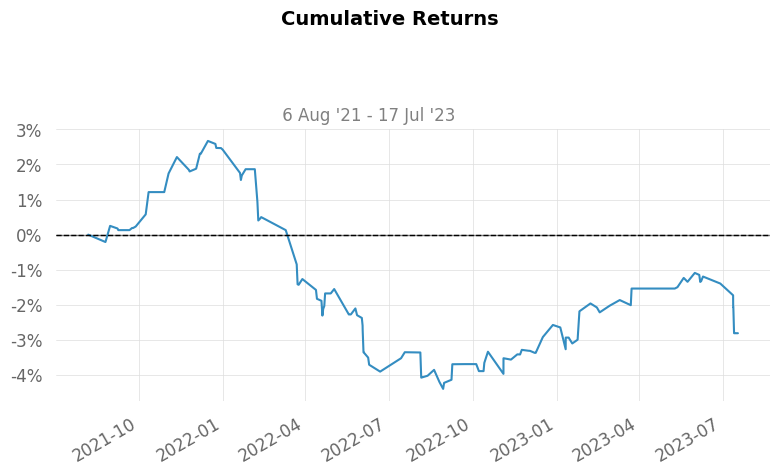

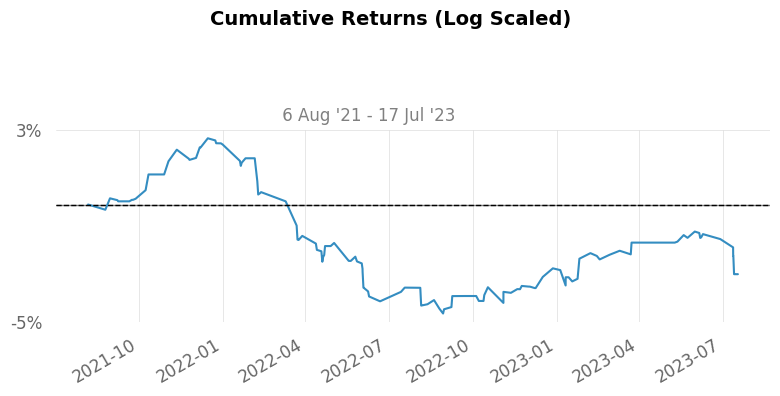

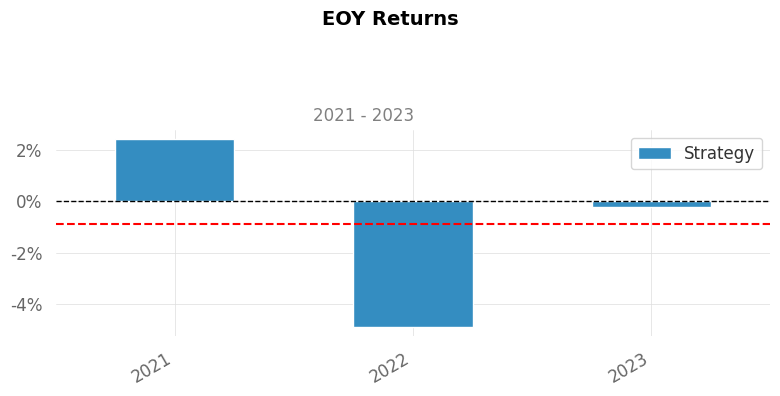

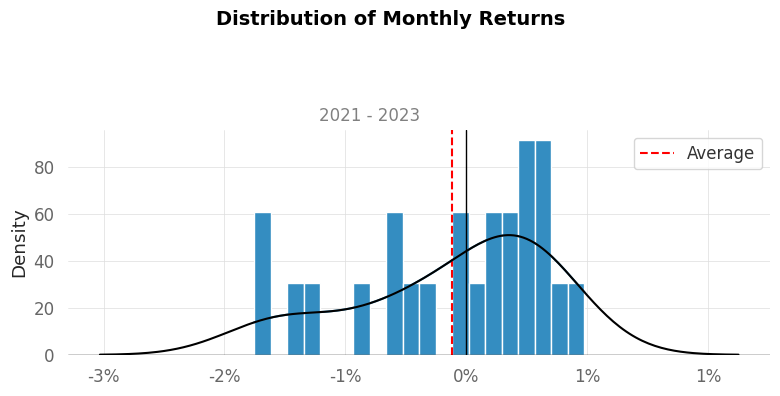

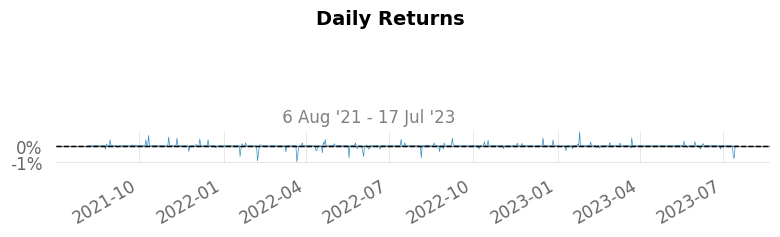

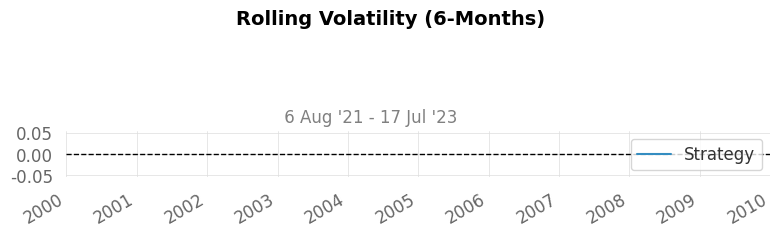

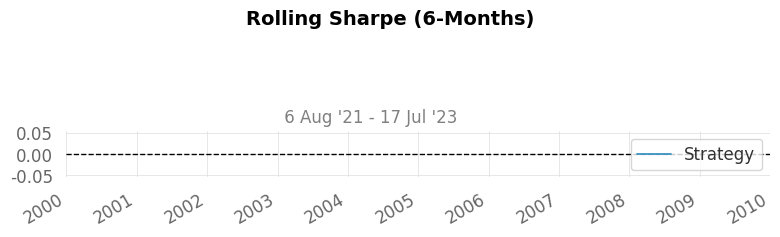

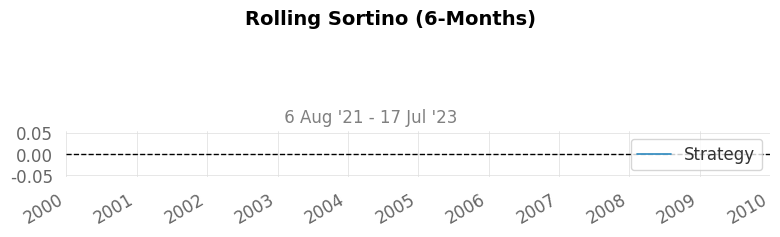

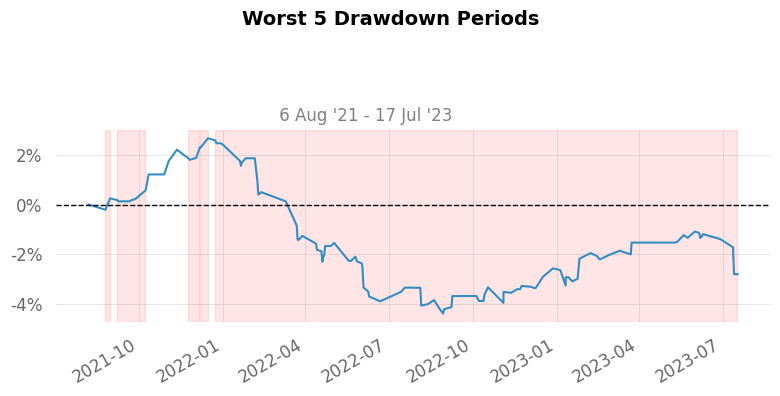

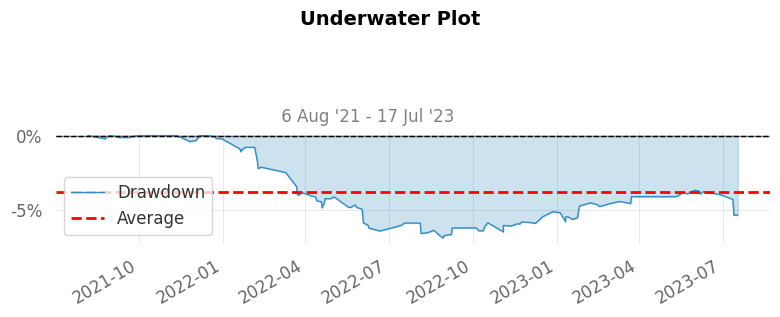

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


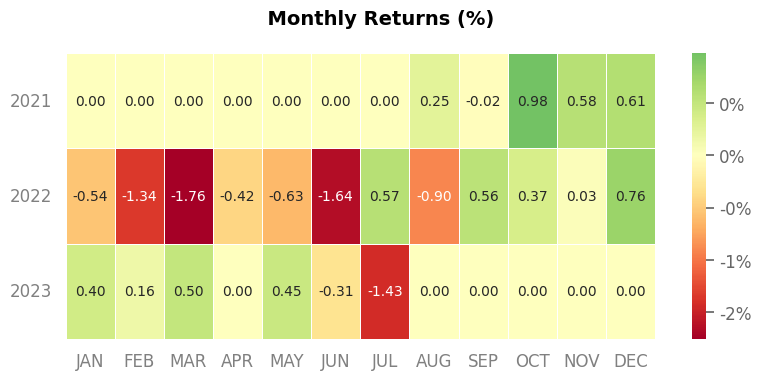

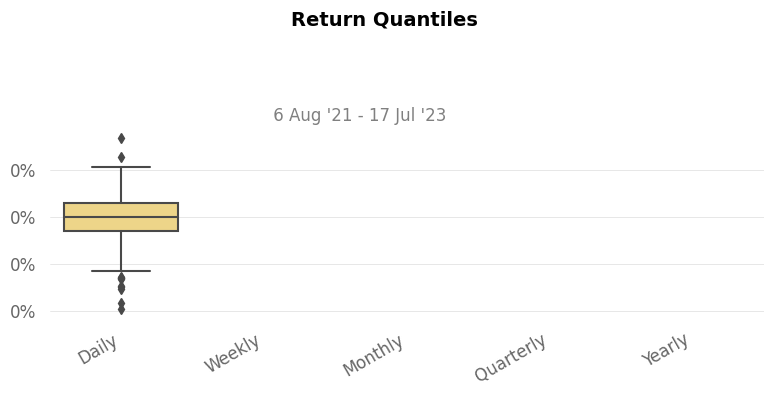

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, mode='quantstats', report='full', html_dump=True, initial_funds=initial_virtual_funds)

### Order History

In [19]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+-------------+---------------------------+----------------------------------+------+
| INST        | TIME                      | ID                               | TT   |
|-------------+---------------------------+----------------------------------+------|
| NSE_EQ:SBIN | 2021-08-06 12:15:00+05:30 | 5b0430fe5e2c47629c009e800badba37 | SELL |
+-------------+---------------------------+----------------------------------+------+
+----+---------------------------+------------------------+-------+
|    | TIME                      | STATE                  | MSG   |
|----+---------------------------+------------------------+-------|
|  0 | 2021-08-06 12:15:00+05:30 | PUT ORDER REQ RECEIVED |       |
|  1 | 2021-08-06 12:15:00+05:30 | VALIDATION PENDING     |       |
|  2 | 2021-08-06 12:15:00+05:30 | OPEN PENDING           |       |
|  3 | 2021-08-06 12:15:00+05:30 | OPEN                   |       |
|  4 | 2021-08-06 12:15:00+05:30 | COMPLETE               |       |
+----+------------------

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---